# Flowers - categorization by species 

In this notebook we will discuss the use of several approaches to models learning to recognize the genre of a flower in the picture.
First, I bulit a simple CNN known as LeNet with only two convolution layers. This will allow me to check if my model is learning at all and what is its weakest performance.
My biggest problem will be too small amount of data, which can cause model overtraining. Because of that I will make "offline" augumentation, technique that allows me to enlarge my data set without adding any extra images. Some of images also can contain valuable information on the edges, so adding "padding", empty frame around the picture will be halpfull.

In [2]:
import pandas as pd
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import talos as ta

from sklearn.metrics import classification_report, confusion_matrix

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.regularizers import l2, l1

from keras.applications import inception_v3
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

Using TensorFlow backend.


In [3]:
train_data_dir = '../data sets/Flower_by_color_categorization/train'
validation_data_dir = '../data sets/Flower_by_color_categorization/validation'

batch_size = 16
img_height, img_width = 96, 96

First I will learn basic CNN with LeNet architecture and no data augumentation.

In [4]:
train_generator = ImageDataGenerator(rescale=1/255)

validation_generator = ImageDataGenerator(rescale=1/255)

# Retrieve images and their classes for train and validation sets
train_flow = train_generator.flow_from_directory(directory=train_data_dir, 
                                                 batch_size=batch_size, 
                                                 target_size=(img_height,img_width))

validation_flow = validation_generator.flow_from_directory(directory=validation_data_dir, 
                                                           batch_size=batch_size,
                                                           target_size=(img_height,img_width),
                                                            shuffle = False)

Found 180 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [3]:
nb_train_samples = 180
nb_validation_samples = 30
n_classes =  10
epochs = 100

### LeNet - basic CNN

LeNet-5, a pioneering 7-level convolutional network by LeCun (1998), that classifies digits, was applied by several banks to recognise hand-written numbers on checks (cheques) digitized in 32x32 pixel greyscale inputimages.

In [10]:
%%html
<img src="https://adeshpande3.github.io/assets/LeNet.png", width=1000>

In [21]:
# Now I built a simple model with LeNet architecture with no optymalization on hyperparameters.

model = Sequential()
model.add(Conv2D(6, (5,5), activation="relu", input_shape= (img_width, img_height, 3)))
model.add(MaxPooling2D(2))

model.add(Conv2D(16, (5,5), activation="relu"))
model.add(MaxPooling2D(2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=["categorical_accuracy"])

model.summary()


# Model saving callback
checkpointer = ModelCheckpoint(filepath='flower_basic_cnn.h5py', monitor='val_categorical_accuracy', save_best_only=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 92, 92, 6)         456       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 46, 46, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 42, 42, 16)        2416      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 21, 21, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7056)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 120)               846840    
_________________________________________________________________
dense_11 (Dense)             (None, 84)               

In [17]:
history = model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    callbacks=[checkpointer],
                    verbose=1,
                    epochs=epochs)

/home/natalia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/home/natalia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<keras_pre..., validation_data=<keras_pre..., callbacks=[<keras.ca..., verbose=1, epochs=100, steps_per_epoch=45, validation_steps=30)`
  import sys


Epoch 1/100
45/45 [==============================] - 5s 120ms/step - loss: 2.3340 - categorical_accuracy: 0.1111 - val_loss: 2.2447 - val_categorical_accuracy: 0.2632
Epoch 2/100
45/45 [==============================] - 5s 113ms/step - loss: 2.1074 - categorical_accuracy: 0.2056 - val_loss: 1.7770 - val_categorical_accuracy: 0.2946
Epoch 3/100
45/45 [==============================] - 5s 111ms/step - loss: 1.7979 - categorical_accuracy: 0.3444 - val_loss: 1.7451 - val_categorical_accuracy: 0.3036
Epoch 4/100
45/45 [==============================] - 5s 116ms/step - loss: 1.6812 - categorical_accuracy: 0.3111 - val_loss: 1.7497 - val_categorical_accuracy: 0.3661
Epoch 5/100
45/45 [==============================] - 5s 107ms/step - loss: 1.6198 - categorical_accuracy: 0.4000 - val_loss: 1.5464 - val_categorical_accuracy: 0.4649
Epoch 6/100
45/45 [==============================] - 5s 105ms/step - loss: 1.3899 - categorical_accuracy: 0.4611 - val_loss: 1.7450 - val_categorical_accuracy: 0.303

Epoch 50/100
45/45 [==============================] - 5s 108ms/step - loss: 0.3017 - categorical_accuracy: 0.9000 - val_loss: 0.7943 - val_categorical_accuracy: 0.7857
Epoch 51/100
45/45 [==============================] - 5s 111ms/step - loss: 0.3017 - categorical_accuracy: 0.8944 - val_loss: 0.8112 - val_categorical_accuracy: 0.7232
Epoch 52/100
45/45 [==============================] - 5s 106ms/step - loss: 0.4142 - categorical_accuracy: 0.8444 - val_loss: 0.5925 - val_categorical_accuracy: 0.7500
Epoch 53/100
45/45 [==============================] - 5s 109ms/step - loss: 0.2779 - categorical_accuracy: 0.8944 - val_loss: 0.7940 - val_categorical_accuracy: 0.8421
Epoch 54/100
45/45 [==============================] - 5s 114ms/step - loss: 0.3381 - categorical_accuracy: 0.8722 - val_loss: 0.7375 - val_categorical_accuracy: 0.7411
Epoch 55/100
45/45 [==============================] - 5s 110ms/step - loss: 0.5003 - categorical_accuracy: 0.8167 - val_loss: 1.3643 - val_categorical_accuracy:

Epoch 99/100
45/45 [==============================] - 5s 102ms/step - loss: 0.2994 - categorical_accuracy: 0.9111 - val_loss: 1.4232 - val_categorical_accuracy: 0.5982
Epoch 100/100
45/45 [==============================] - 5s 101ms/step - loss: 0.5986 - categorical_accuracy: 0.8500 - val_loss: 1.4042 - val_categorical_accuracy: 0.6339


In [54]:
# loss an accuracy on validation samples
model.load_weights("flower_basic_cnn.h5py")
model.evaluate_generator(validation_flow, nb_validation_samples)

[0.758245103624132, 0.8666666581895617]

In [83]:
np.argmax(model.predict_generator(validation_flow), axis=1)

array([8, 5, 7, 0, 2, 3, 4, 8, 1, 2, 8, 1, 7, 5, 6, 0, 0, 3, 3, 4, 3, 8,
       9, 7, 4, 2, 4, 8, 5, 3])

In [55]:
#Confution Matrix
Y_pred = model.predict_generator(validation_flow)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
matrix = confusion_matrix(validation_flow.classes, y_pred)
new_matrix = pd.DataFrame(matrix)
print(new_matrix)

Confusion Matrix
   0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  0  0  0  0  2  1
1  0  0  1  0  1  0  0  1  0  0
2  0  1  0  2  0  0  0  0  0  0
3  0  1  1  0  0  0  1  0  0  0
4  0  1  0  0  1  0  0  1  0  0
5  1  0  0  0  1  0  0  1  0  0
6  2  0  0  0  0  0  0  0  1  0
7  0  0  1  0  0  1  0  0  0  1
8  0  0  0  0  0  0  0  0  1  2
9  1  0  0  1  0  1  0  0  0  0


In [56]:
#Classification Report
print('Classification Report')
target_names = ['Geranium', 'Rose', 'English merigold', 'Viola', 'Daisy', 
           'Trillium', 'Iris', 'Dandelion', 'Dahlia', 'Tiger Lily']
report = classification_report(validation_flow.classes, y_pred, target_names=target_names)
print(report)

Classification Report
                  precision    recall  f1-score   support

        Geranium       0.00      0.00      0.00         3
            Rose       0.00      0.00      0.00         3
English merigold       0.00      0.00      0.00         3
           Viola       0.00      0.00      0.00         3
           Daisy       0.33      0.33      0.33         3
        Trillium       0.00      0.00      0.00         3
            Iris       0.00      0.00      0.00         3
       Dandelion       0.00      0.00      0.00         3
          Dahlia       0.25      0.33      0.29         3
      Tiger Lily       0.00      0.00      0.00         3

       micro avg       0.07      0.07      0.07        30
       macro avg       0.06      0.07      0.06        30
    weighted avg       0.06      0.07      0.06        30



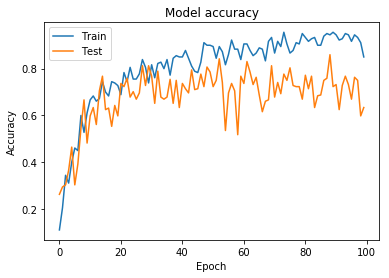

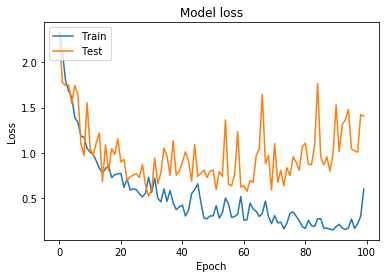

In [19]:
fig, ax = plt.subplots()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

As we can see, there is a problem with overfitting on the train set. During epochs accuracy is increasing and loss is deacresing at train set, but from some point it's doing opposite on validation set. Our model is overtrained and will not predict classes properly. 

This situation provides me to next steps:
    * padding
    * data augumentation
    * hyperparameters optimalization
    * early stopping
    * transfer learning using pre-trained models

Below I will one more time generate training and validation set, but this time I will add data augumentation. Keras ImageDataGenerator class allows us to change our data set in many ways, for example:
    * random rotation 
    * zoom
    * horizontal and vertical flip
    * rescale
    * width and heigth shift
    * brightness
    * shear
    * fill points outside the boundaries of the input
    
Now every photo used for learning during epochs will be a little bit diffrent.

In [60]:
batch_size = 16
# Pixel values rescaling from [0, 255] to [0, 1] interval
train_generator = ImageDataGenerator(rescale=1/255, 
                                     rotation_range=90, 
                                     zoom_range=[0.5, 1.5], 
                                     horizontal_flip=True,
                                     vertical_flip=True, 
                                     width_shift_range=0.1, 
                                     height_shift_range=0.1, 
                                     fill_mode='reflect', 
                                     shear_range=0.01, 
                                     brightness_range=[0.5, 1.5])

validation_generator = ImageDataGenerator(rescale=1/255)

train_flow = train_generator.flow_from_directory(directory=train_data_dir, 
                                                 batch_size=batch_size, 
                                                 target_size=(img_height,img_width))

validation_flow = validation_generator.flow_from_directory(directory=validation_data_dir, 
                                                           batch_size=batch_size,
                                                           target_size=(img_height,img_width))

Found 180 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


For hyperparameters optimalization I will use [Talos](https://github.com/autonomio/talos) great tool made espacially for this. There are few hyperparameters which we can tune, in order of importance it is:
    * learning rate
    * loss function
    * layer size
    * weight initialization
    * model depht
    * layer params (eg. kernel size)
    * weight of regularization
    * optimizer choice
    * batch size
    * nonlinearity
    
I decide to optimize only some of the above: learning rate, loss function, leyer size, weight initialization, non-linearity by changing activation funtions and batch size.

In [66]:
params = {'first_neuron':[4,6,8],
          'weights_regularization': [None, 
                                     l1(0.001), l1(0.01), 
                                     l1(0.1), l1(1),
                                     l2(0.001), l2(0.01), 
                                     l2(0.1), l2(1)],
          'batch_size': [16, 32, 64],
          'losses': ['categorical_crossentropy', 
                     'sparse_categorical_crossentropy', 
                     'kullback_leibler_divergence'],
          'last_activation': ['sigmoid', 'softmax'],
          'epochs' : [100]
          'optimizer' : ['adam', 'Nadam', 'sgd']
     }

In [77]:
def new_better_model(img_width, img_height, 
                train_flow, nb_train_samples, 
                validation_flow, nb_validation_samples, 
                params):
    
    model = Sequential()
    model.add(Conv2D(6, (5,5), activation="relu", input_shape= (img_width, img_height, 3), padding='same'))
    model.add(MaxPooling2D(2))

    model.add(Conv2D(16, (5,5), activation="relu"))
    model.add(MaxPooling2D(2))

    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
            optimizer='nadam',
            metrics=["categorical_accuracy"])
    
    # Model saving callback
    checkpointer = ModelCheckpoint(filepath='flower_better_cnn.h5py', 
                               monitor='val_categorical_accuracy', save_best_only=True)
    
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_categorical_accuracy', verbose=1, patience=10)
    
    history = model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    callbacks=[early_stopping,
                              checkpointer],
                    verbose=1,
                    epochs=100)
    
    return history, model

In [78]:
history, model = new_better_model(img_width, img_height, 
                train_flow, nb_train_samples, 
                validation_flow, nb_validation_samples, 
                params)

Epoch 1/100
11/11 [==============================] - 8s 705ms/step - loss: 2.4202 - categorical_accuracy: 0.1700 - val_loss: 2.1553 - val_categorical_accuracy: 0.2000
Epoch 2/100
11/11 [==============================] - 7s 592ms/step - loss: 2.1567 - categorical_accuracy: 0.1585 - val_loss: 1.9792 - val_categorical_accuracy: 0.3000
Epoch 3/100
11/11 [==============================] - 6s 558ms/step - loss: 2.0260 - categorical_accuracy: 0.2885 - val_loss: 2.6150 - val_categorical_accuracy: 0.1000
Epoch 4/100
11/11 [==============================] - 6s 566ms/step - loss: 1.9762 - categorical_accuracy: 0.2841 - val_loss: 1.6410 - val_categorical_accuracy: 0.4000
Epoch 5/100
11/11 [==============================] - 6s 561ms/step - loss: 1.7276 - categorical_accuracy: 0.3446 - val_loss: 1.6343 - val_categorical_accuracy: 0.3333
Epoch 6/100
11/11 [==============================] - 6s 530ms/step - loss: 1.9082 - categorical_accuracy: 0.4169 - val_loss: 1.6411 - val_categorical_accuracy: 0.333

In [74]:
validation_flow.

30

In [79]:
#Confution Matrix
Y_pred = model.predict_generator(validation_flow)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
matrix = confusion_matrix(validation_flow.classes, y_pred)
new_matrix = pd.DataFrame(matrix)
print(new_matrix)

Confusion Matrix
   0  1  2  3  4  5  6  7  8  9
0  1  0  2  0  0  0  0  0  0  0
1  0  1  0  0  0  0  0  1  1  0
2  0  0  0  1  0  1  1  0  0  0
3  0  0  0  0  1  1  0  0  1  0
4  1  0  0  0  0  0  0  1  1  0
5  1  0  0  1  0  0  0  0  1  0
6  0  0  1  0  0  0  0  1  1  0
7  0  0  0  1  1  1  0  0  0  0
8  0  0  0  1  1  0  0  0  0  1
9  0  1  0  1  1  0  0  0  0  0


In [80]:
#Classification Report
print('Classification Report')
target_names = ['Geranium', 'Rose', 'English merigold', 'Viola', 'Daisy', 
           'Trillium', 'Iris', 'Dandelion', 'Dahlia', 'Tiger Lily']
report = classification_report(validation_flow.classes, y_pred, target_names=target_names)
print(report)

Classification Report
                  precision    recall  f1-score   support

        Geranium       0.33      0.33      0.33         3
            Rose       0.50      0.33      0.40         3
English merigold       0.00      0.00      0.00         3
           Viola       0.00      0.00      0.00         3
           Daisy       0.00      0.00      0.00         3
        Trillium       0.00      0.00      0.00         3
            Iris       0.00      0.00      0.00         3
       Dandelion       0.00      0.00      0.00         3
          Dahlia       0.00      0.00      0.00         3
      Tiger Lily       0.00      0.00      0.00         3

       micro avg       0.07      0.07      0.07        30
       macro avg       0.08      0.07      0.07        30
    weighted avg       0.08      0.07      0.07        30



In [70]:
talos_experiment = ta.Scan(
            x = validation_flow.,
            y = validation_flow.classes,
            model = new_better_model,
            params = params,
            dataset_name = 'flowers',
            experiment_no = '1',
            grid_downsample = 0.1
           )

NameError: name 'x' is not defined

In [42]:
def new_better_model(train_flow, validation_flow, nb_train_samples, nb_validation_samples, params):
    
    model = Sequential()
    model.add(Conv2D(params['first_neuron'], 
                     (5,5), 
                     activation="relu", 
                     input_shape= (img_width, img_height, 3),
                     padding="same"))
    model.add(MaxPooling2D(2))

    model.add(Conv2D(16, (5,5), activation="relu"))
    model.add(MaxPooling2D(2))

    model.add(Flatten())
    model.add(Dense(120, activation='relu', kernel_regularizer=params['weights_regularization']))
    model.add(Dense(84, activation='relu', kernel_regularizer=params['weights_regularization']))
    model.add(Dense(10, activation=params['last_activation'], kernel_regularizer=params['weights_regularization']))

    model.compile(loss=params['losses'],
            optimizer="adam",
            metrics=["categorical_accuracy"])
    
    # Model saving callback
    checkpointer = ModelCheckpoint(filepath='flower_better_cnn.h5py', 
                               monitor='val_categorical_accuracy', save_best_only=True)
    
    # Early stopping
    early_stopping = EarlyStopping(monitor='val_categorical_accuracy', verbose=1, patience=5)
    
    history = model.fit_generator(generator=train_flow, 
                    samples_per_epoch=nb_train_samples,
                    validation_data=validation_flow,
                    nb_val_samples=nb_validation_samples,
                    callbacks=[early_stopping,
                              checkpointer],
                    verbose=1,
                    epochs=epochs)
    
    return history, model

Finally I will add early stopping, which is not the most important thing in debugging CNN, but will help avoid overfitting if everything above won't be enough.

In [ ]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_categorical_accuracy', verbose=1, patience=5)

# Model saving callback
checkpointer = ModelCheckpoint(filepath='flower_better_cnn.h5py', 
                               monitor='val_categorical_accuracy', save_best_only=True)

Now I will consider VGG16 model. Let's check if this model will predict anything on sample of data.

In [9]:
%%html
<img src='../data sets/Flower_by_color_categorization/train/0/0005.png', width=200>

In [14]:
model = InceptionV3(weights = 'imagenet', include_top = True)

img_path = r'../data sets/Flower_by_color_categorization/train/0/0005.png'
img = image.load_img(img_path, target_size= (224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = preprocess_input(x)

preds = model.predict(x)
print ('Predicted:', decode_predictions(preds)[0])

96116736/96112376 [==============================] - 71s 1us/step
Predicted: [('n03991062', 'pot', 0.87389034), ('n03930313', 'picket_fence', 0.04699375), ('n03457902', 'greenhouse', 0.027790138), ('n04522168', 'vase', 0.0045657544), ('n03461385', 'grocery_store', 0.0039166315)]


In [ ]:
# confusion matrix
preds = np.argmax(probs, axis=1)
probs = probs[:,1]
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

plot_confusion_matrix(cm, data.classes)

https://towardsdatascience.com/flower-classification-with-convolutional-neural-networks-b97130329e5f